## 因果探索手法VAR-LiNGAM

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import graphviz
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

['1.21.4', '1.3.4', '0.19.1', '1.5.4']


In [3]:
np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

In [4]:
# macrodata
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
dates = mdata[["year", "quarter"]].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)

df = mdata[["realgdp", "realcons", "realinv"]]
df.index = pd.DatetimeIndex(quarterly)
df

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


In [6]:
model = lingam.VARLiNGAM()
model.fit(df)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/si

In [7]:
model.causal_order_

[1, 2, 0]

In [8]:
model.adjacency_matrices_[0]

array([[0.   , 0.894, 0.902],
       [0.   , 0.   , 0.   ],
       [0.   , 0.416, 0.   ]])

In [9]:
model.adjacency_matrices_[1]

array([[ 0.991, -0.872, -0.931],
       [ 0.047,  0.926,  0.055],
       [ 0.008, -0.428,  0.989]])

In [10]:
model.residuals_

array([[  44.239,    9.944,   18.542],
       [ -30.042,   -0.838,  -28.113],
       [ -14.66 ,  -14.347,    4.78 ],
       [  37.402,   -0.322,   26.706],
       [ -41.619,    1.806,  -40.635],
       [ -20.024,  -23.556,   -7.105],
       [ -61.859,  -14.7  ,  -42.352],
       [  -5.376,  -13.693,    2.455],
       [  29.512,   12.224,   15.091],
       [  21.725,   -7.173,   18.67 ],
       [  32.032,   17.679,   -1.275],
       [  25.457,    0.611,   12.151],
       [   3.488,    1.836,  -10.749],
       [  -1.565,   -5.542,   -1.493],
       [ -22.933,    5.744,  -18.925],
       [  12.235,   -6.07 ,   11.554],
       [   9.257,   -2.396,   -2.289],
       [  28.902,    5.069,    3.723],
       [  -7.931,   -6.472,   -3.862],
       [  40.542,   16.473,    6.679],
       [   4.209,   11.468,  -10.558],
       [  12.58 ,   14.748,    0.674],
       [ -23.561,  -17.547,   -4.875],
       [  51.096,   23.879,   31.16 ],
       [  12.364,   -2.115,   -8.871],
       [  36.229,   11.24

In [11]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

array([[0.   , 0.894, 0.902],
       [0.   , 0.   , 0.   ],
       [0.   , 0.416, 0.   ]])

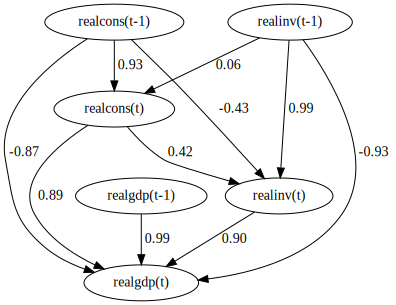

In [12]:
labels = [
    "realgdp(t)",
    "realcons(t)",
    "realinv(t)",
    "realgdp(t-1)",
    "realcons(t-1)",
    "realinv(t-1)",
]
make_dot(
    np.hstack(model.adjacency_matrices_),
    ignore_shape=True,
    lower_limit=0.05,
    labels=labels,
)

In [13]:
# Independence between error variables
p_values = model.get_error_independence_p_values()
print(p_values)

[[0.    0.844 0.232]
 [0.844 0.    0.006]
 [0.232 0.006 0.   ]]


In [14]:
# Bootstrap
model = lingam.VARLiNGAM()
result = model.bootstrap(df, n_sampling=100)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/si

In [15]:
# Causal Directions
cdc = result.get_causal_direction_counts(
    n_directions=8, min_causal_effect=0.3, split_by_causal_effect_sign=True
)

In [16]:
print_causal_directions(cdc, 100, labels=labels)

realcons(t) <--- realcons(t-1) (b>0) (100.0%)
realgdp(t) <--- realgdp(t-1) (b>0) (100.0%)
realinv(t) <--- realinv(t-1) (b>0) (100.0%)
realgdp(t) <--- realcons(t-1) (b<0) (83.0%)
realgdp(t) <--- realcons(t) (b>0) (83.0%)
realgdp(t) <--- realinv(t-1) (b<0) (62.0%)
realgdp(t) <--- realinv(t) (b>0) (62.0%)
realinv(t) <--- realcons(t-1) (b<0) (52.0%)


In [17]:
# Directed Acyclic Graphs
dagc = result.get_directed_acyclic_graph_counts(
    n_dags=3, min_causal_effect=0.2, split_by_causal_effect_sign=True
)

In [18]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 53.0%
	realgdp(t) <--- realcons(t) (b>0)
	realgdp(t) <--- realinv(t) (b>0)
	realgdp(t) <--- realgdp(t-1) (b>0)
	realgdp(t) <--- realcons(t-1) (b<0)
	realgdp(t) <--- realinv(t-1) (b<0)
	realcons(t) <--- realcons(t-1) (b>0)
	realinv(t) <--- realcons(t) (b>0)
	realinv(t) <--- realcons(t-1) (b<0)
	realinv(t) <--- realinv(t-1) (b>0)
DAG[1]: 23.0%
	realgdp(t) <--- realcons(t) (b>0)
	realgdp(t) <--- realgdp(t-1) (b>0)
	realgdp(t) <--- realcons(t-1) (b<0)
	realcons(t) <--- realcons(t-1) (b>0)
	realinv(t) <--- realgdp(t) (b>0)
	realinv(t) <--- realcons(t) (b<0)
	realinv(t) <--- realgdp(t-1) (b<0)
	realinv(t) <--- realcons(t-1) (b>0)
	realinv(t) <--- realinv(t-1) (b>0)
DAG[2]: 13.0%
	realgdp(t) <--- realgdp(t-1) (b>0)
	realcons(t) <--- realgdp(t) (b>0)
	realcons(t) <--- realinv(t) (b<0)
	realcons(t) <--- realgdp(t-1) (b<0)
	realcons(t) <--- realcons(t-1) (b>0)
	realcons(t) <--- realinv(t-1) (b>0)
	realinv(t) <--- realgdp(t) (b>0)
	realinv(t) <--- realgdp(t-1) (b<0)
	realinv(t) <--- reali

In [19]:
# Probability
prob = result.get_probabilities(min_causal_effect=0.1)
print("Probability of B0:\n", prob[0])
print("Probability of B1:\n", prob[1])

Probability of B0:
 [[0.   0.83 0.62]
 [0.17 0.   0.17]
 [0.38 0.78 0.  ]]
Probability of B1:
 [[1.   0.83 0.62]
 [0.17 1.   0.16]
 [0.38 0.78 1.  ]]


In [20]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)

df["from"] = df["from"].apply(lambda x: labels[x])
df["to"] = df["to"].apply(lambda x: labels[x])
df

,from,to,effect,probability
0,realgdp(t-1),realgdp(t),0.890973,1.00
1,realcons(t-1),realcons(t),0.870912,1.00
2,realinv(t-1),realinv(t),0.970941,1.00
3,realinv(t-1),realgdp(t),0.402211,0.69
4,realcons(t),realgdp(t),1.095907,0.57
5,realcons(t-1),realgdp(t),0.781020,0.52
6,realgdp(t-1),realcons(t),0.114339,0.51
7,realinv(t),realgdp(t),0.500163,0.49
8,realinv(t-1),realcons(t),0.173004,0.24
9,realgdp(t),realcons(t),0.191790,0.17


In [21]:
df.sort_values("effect", ascending=False).head()

,from,to,effect,probability
4,realcons(t),realgdp(t),1.095907,0.57
2,realinv(t-1),realinv(t),0.970941,1.00
0,realgdp(t-1),realgdp(t),0.890973,1.00
1,realcons(t-1),realcons(t),0.870912,1.00
5,realcons(t-1),realgdp(t),0.781020,0.52


In [22]:
df[df["to"] == "realgdp(t)"].head()

,from,to,effect,probability
0,realgdp(t-1),realgdp(t),0.890973,1.00
3,realinv(t-1),realgdp(t),0.402211,0.69
4,realcons(t),realgdp(t),1.095907,0.57
5,realcons(t-1),realgdp(t),0.781020,0.52
7,realinv(t),realgdp(t),0.500163,0.49
